# Dự án thực hành
```
ProtonX - AI for devs
```

### Hướng dẫn làm bài
- Trong bài tập này bạn sẽ sử dụng Python 3.
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới.

### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**
- **Không thay đổi dòng code return của hàm**

Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO: Lập trình tại đây` và thay thế các vị trí `None`. Có những câu hỏi chỉ cần trả về đáp án.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó.

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Các bài tập sẽ được chấm dựa trên các Test-case.
* Các bạn không khởi tạo lại giá trị đầu vào bên trong hàm. Có thể khởi tạo các giá trị này ngoài hàm nhằm mục đích kiểm thử.

## Quan trọng: Dựa vào [notebook này](https://github.com/facebookresearch/segment-anything-2/blob/main/notebooks/automatic_mask_generator_example.ipynb) để chạy SAM với Flask:

### Cài đặt Ngrok

In [ ]:
!pip install flask pyngrok
!pip install flask-cors

In [ ]:
from pyngrok import ngrok
from google.colab import userdata

# Replace 'YOUR_NGROK_AUTHTOKEN' with the authtoken you copied from the ngrok dashboard
authtoken = userdata.get("ngrok_key")
ngrok.set_auth_token(authtoken)


### Tải model

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

--2024-08-01 07:45:03--  https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.67.181.104, 18.67.181.36, 18.67.181.99, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.67.181.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 897952466 (856M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2_hiera_large.pt.1’

sam2_hiera_large.pt 100%[===================>] 856.35M   207MB/s    in 4.2s    

2024-08-01 07:45:07 (206 MB/s) - ‘sam2_hiera_large.pt.1’ saved [897952466/897952466]



In [ ]:
!git clone https://github.com/facebookresearch/segment-anything-2.git

fatal: destination path 'segment-anything-2' already exists and is not an empty directory.


In [ ]:
%cd /content/segment-anything-2
!pip install -e .

/content/segment-anything-2


In [ ]:
from PIL import Image

In [ ]:
import numpy as np
image = Image.open('/content/truck.jpg')
image = np.array(image.convert("RGB"))

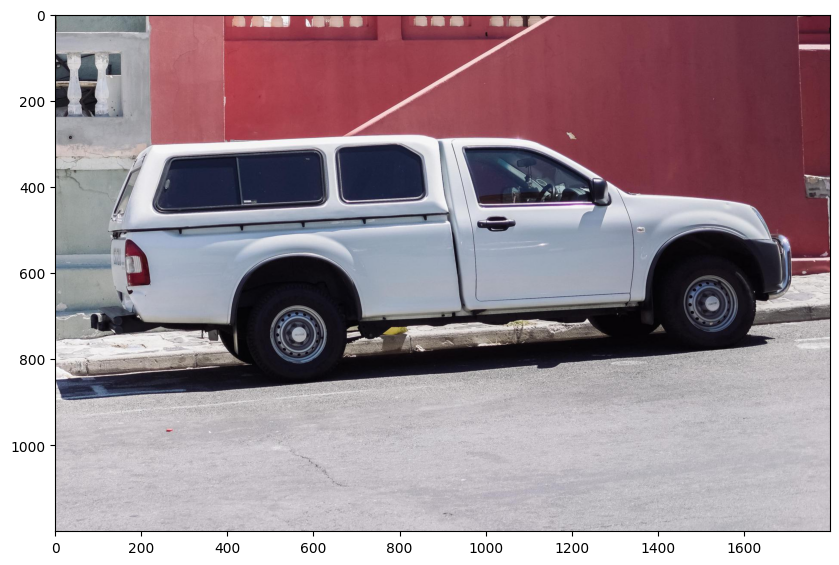

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('on')
plt.show()

Hàm hiện mask

In [ ]:
def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0,0,1,0.4), thickness=1)

    ax.imshow(img)

In [ ]:
image = Image.open('/content/truck.jpg')
image = np.array(image.convert("RGB"))

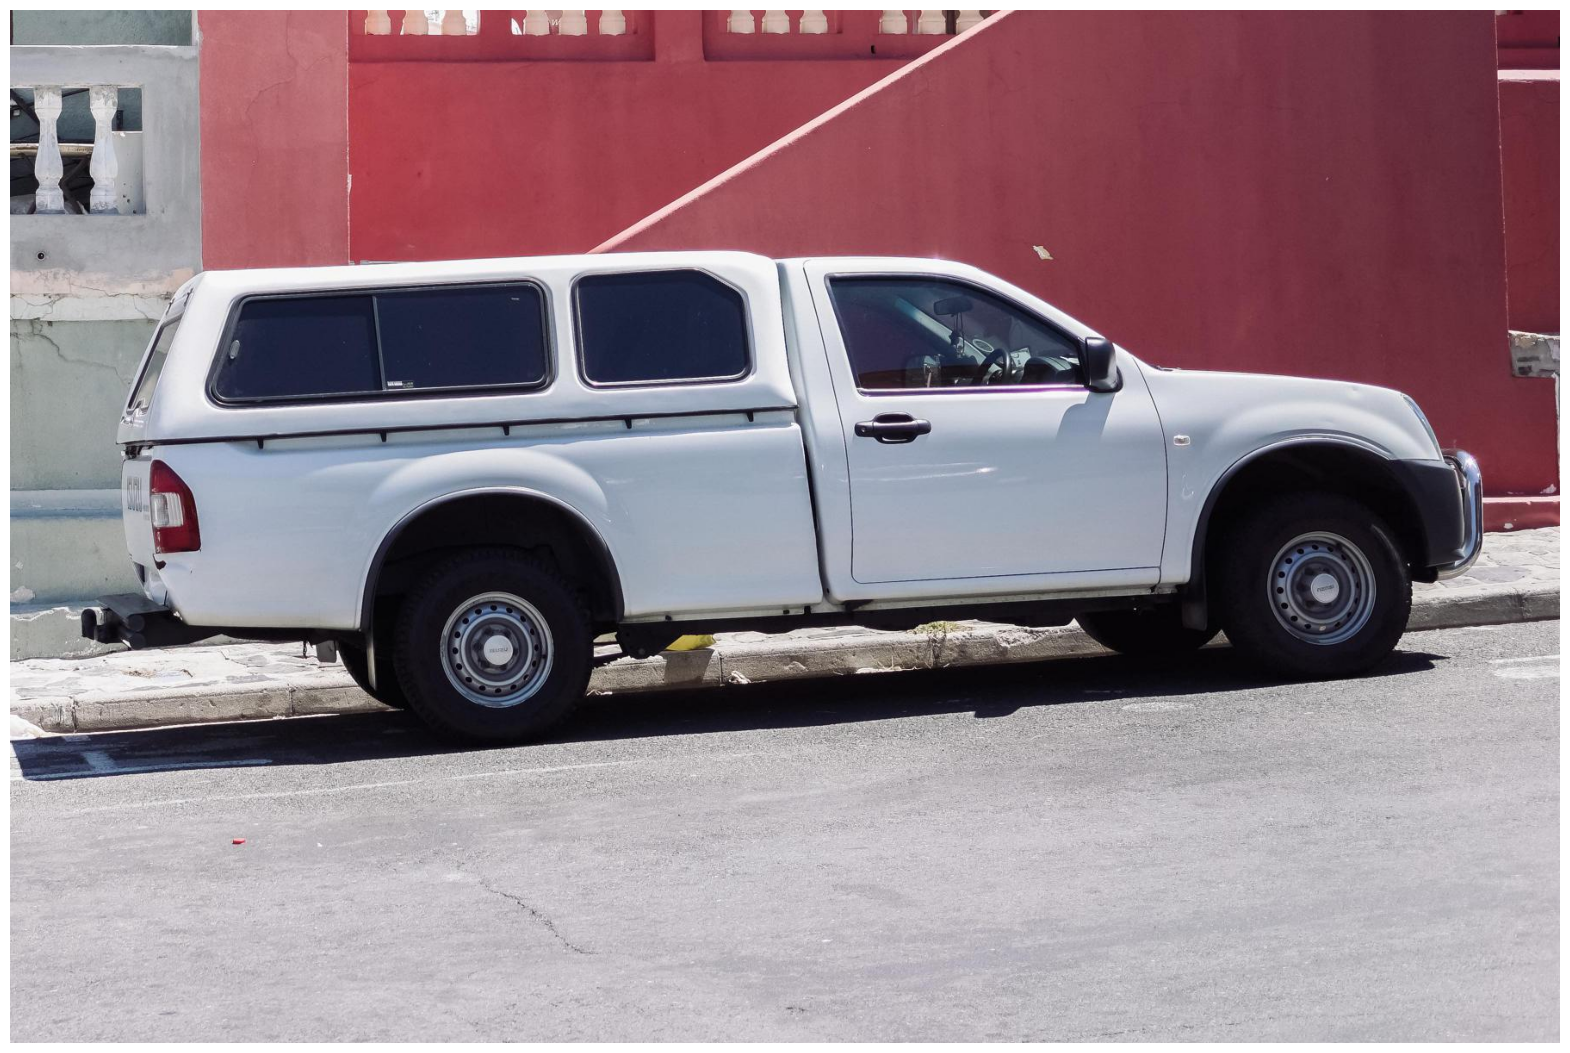

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

Chạy model

In [ ]:
from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

# TODO 1: Load model
sam2_checkpoint = None
model_cfg = None
sam2 = None
mask_generator = None

# TODO 2: Run model trên ảnh
masks = None

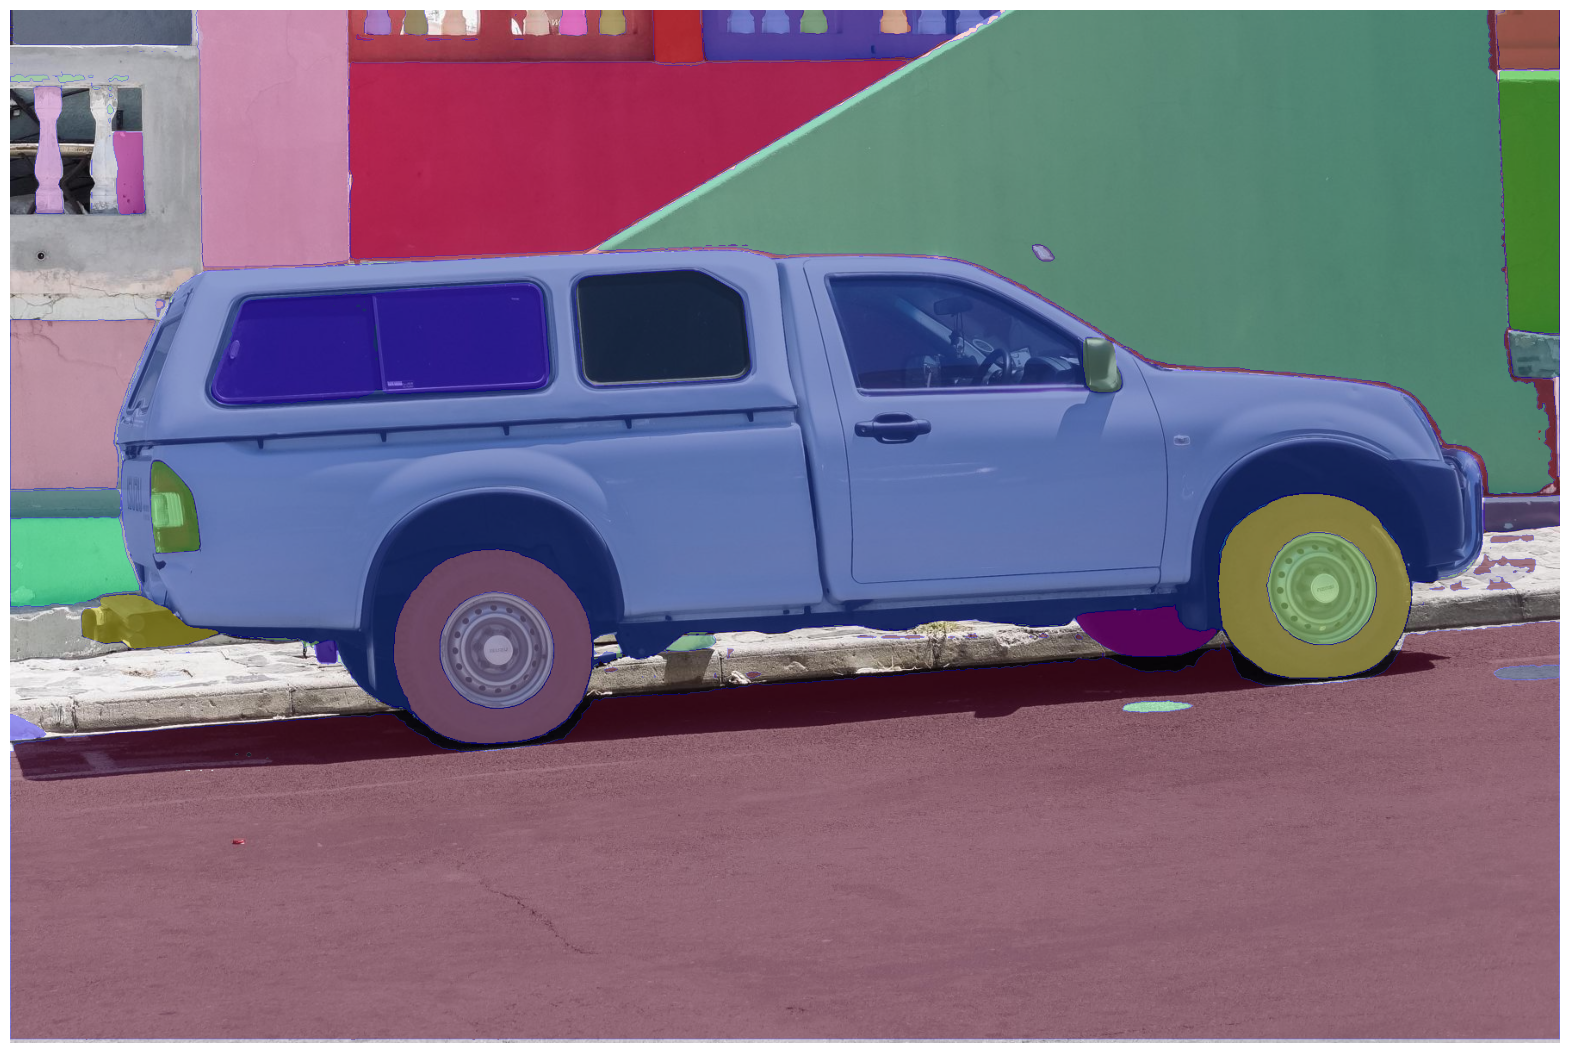

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import multiprocessing as mp
import time

def convert_chunk(chunk):
    return chunk.tolist()

def array_to_list_in_parallel(array, num_processes):
    # Determine the size of each chunk
    chunk_size = array.shape[0] // num_processes

    # Create chunks of the array
    chunks = [array[i*chunk_size:(i+1)*chunk_size] for i in range(num_processes)]

    # Use multiprocessing to convert each chunk to a list
    with mp.Pool(num_processes) as pool:
        result = pool.map(convert_chunk, chunks)

    # Combine the results into a single list
    list_representation = []
    for chunk_list in result:
        list_representation.extend(chunk_list)

    return list_representation


In [ ]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
from flask_cors import CORS
import cv2
import json

app = Flask(__name__)
CORS(app)  # Enable CORS

# Initialize your SAM generator (assuming it's done like this)
mask_generator = SAM2AutomaticMaskGenerator(sam2)

@app.route('/')
def home():
    return "Hello, World!"

@app.route('/sam2', methods=['POST'])
def sam_endpoint():
    # TODO 3: Nhận ảnh từ client
    file = None
    image = None
    image = None


    # TODO 4: Chạy Inference trên ảnh
    masks = None

    masks = sorted(masks, key=(lambda x: x['area']), reverse=True)

    masks = masks[:4]

    # Convert masks to a serializable format
    new_masks = []
    for item in masks:
        new_masks.append({
            "segmentation": array_to_list_in_parallel(item["segmentation"], mp.cpu_count()),
        })
    json_data = json.dumps(new_masks)

    return jsonify(json_data)

# Terminate any open tunnels if running in a reused environment
ngrok.kill()

# Create a tunnel to the default Flask port 5000
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")

if __name__ == '__main__':
    app.run()


Public URL: NgrokTunnel: "https://0019-34-143-239-90.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
<ipython-input-145-57e0588f1081>:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  image = cv2.imdecode(np.fromstring(file.read(), np.uint8), cv2.IMREAD_COLOR)
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 08:55:01] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 08:55:31] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 08:56:51] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 08:57:23] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 09:01:54] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 09:06:47] "POST /sam2 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Aug/2024 09:14:30] "POST /sam2 HTTP/1.1"